## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
# Import necessary libraries
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating data visualizations
import numpy as np              # For numerical operations
import zipfile                  # For working with compressed files
import sqlite3                  # For working with SQLite databases
from collections import Counter
import seaborn as sns

# Enable inline plotting for Jupyter Notebook or Jupyter Lab
%matplotlib inline

# Set an option to display all columns when viewing DataFrames
pd.set_option('display.max_columns', None)

## Tomato Data


In [3]:
reviews = pd.read_csv('zippedData\\rt.reviews.tsv.gz', sep='\t', compression='gzip', encoding='latin1')
movie_info = pd.read_csv('zippedData\\rt.movie_info.tsv.gz', sep='\t', compression='gzip', encoding='latin1')

In [4]:
tomatodata = pd.merge(reviews, movie_info, on= 'id', how = 'left')
tomatodata.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [5]:
# Group by 'genre' and count 'fresh' and 'rotten'
tomatodataSorted = tomatodata.groupby(['genre', 'fresh']).size().unstack(fill_value=0)

# Rename the columns for clarity
tomatodataSorted.columns = ['fresh_count', 'rotten_count']

# Reset the index
tomatodataSorted = tomatodataSorted.reset_index()

tomatodataSorted = tomatodataSorted.sort_values(by='fresh_count', ascending=False).head(10)
tomatodataSorted

,genre,fresh_count,rotten_count
212,Drama,4969,2444
170,Comedy|Drama,2953,1224
165,Comedy,1950,2615
224,Drama|Mystery and Suspense,1780,1111
227,Drama|Romance,1174,624
58,Action and Adventure|Drama|Mystery and Suspense,1148,777
178,Comedy|Drama|Romance,1110,870
198,Comedy|Romance,962,600
114,Art House and International|Drama,838,212
74,Action and Adventure|Science Fiction and Fantasy,767,773


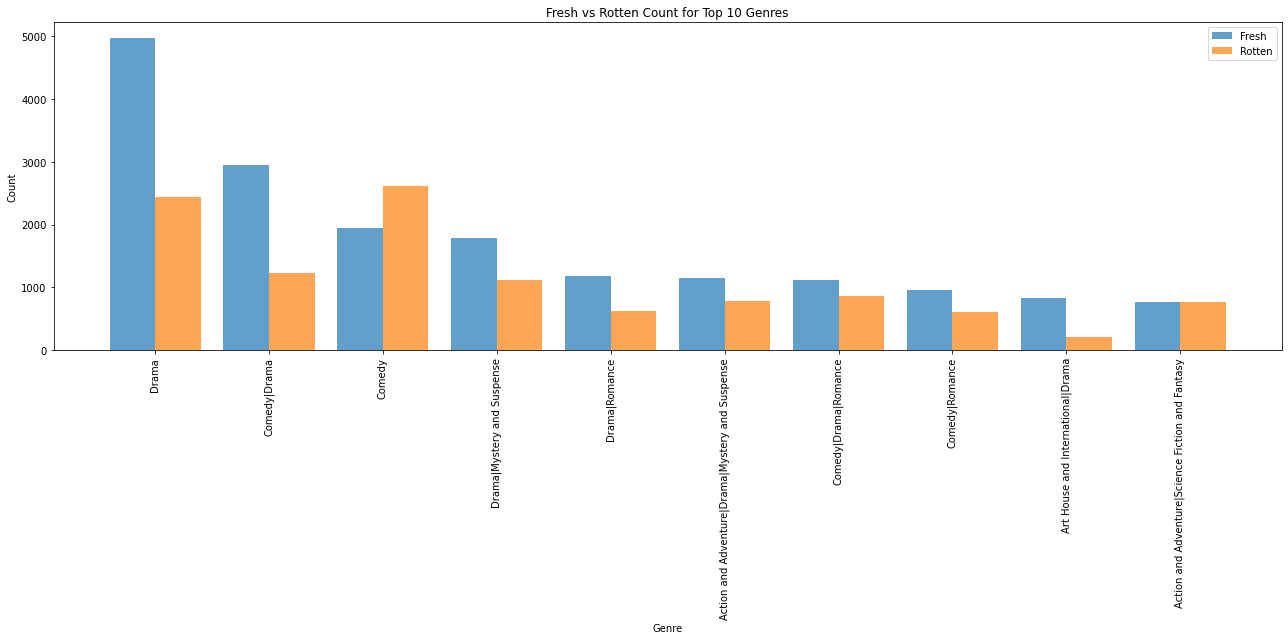

In [6]:
# Create a bar graph
plt.figure(figsize=(18, 9))

# Define the x positions for the bars
x = range(len(tomatodataSorted))

# Set the bar width
bar_width = 0.4

# Plot 'fresh_count' and 'rotten_count' as separate bars
plt.bar(x, tomatodataSorted['fresh_count'], width=bar_width, label='Fresh', alpha=0.7)
plt.bar([i + bar_width for i in x], tomatodataSorted['rotten_count'], width=bar_width, label='Rotten', alpha=0.7)

# Set the x-axis labels to be genre names
plt.xticks([i + bar_width/2 for i in x], tomatodataSorted['genre'], rotation=90)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Fresh vs Rotten Count for Top 10 Genres')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


## TMDB DATA

In [13]:
# Load the movie details DataFrame from a compressed CSV file
movies_details = pd.read_csv('zippedData\\tmdb.movies.csv.gz', compression='gzip', encoding='latin1')

# Select only the columns 'genre_ids', 'vote_average', and 'vote_count'
movies_details = movies_details[['genre_ids', 'vote_average', 'vote_count']]

# Group the DataFrame by 'genre_ids' and calculate the mean 'vote_average' and total 'vote_count' for each genre
genre_stats = movies_details.groupby('genre_ids').agg({
    'vote_average': 'mean',    # Calculate the mean vote_average for each genre
    'vote_count': 'sum'        # Calculate the sum of vote_count for each genre
}).reset_index()                # Reset the index to have a clean DataFrame

# Display the first few rows of the aggregated DataFrame
genre_stats.head()


,genre_ids,vote_average,vote_count
0,"[10402, 10749, 18]",7.950000,46
1,"[10402, 10749, 35, 18]",6.500000,240
2,"[10402, 10749, 35]",6.500000,11
3,"[10402, 10749]",5.466667,109
4,"[10402, 10751, 14, 10770, 35]",5.400000,36


In [14]:
tmdbGenre = {28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [16]:

# Replace genre_ids with genre names using the tmdbGenre dictionary
genre_stats['genre_ids'] = genre_stats['genre_ids'].apply(lambda x: [tmdbGenre[i] for i in eval(x)])

# Display the updated DataFrame
print(genre_stats)

                                       genre_ids  vote_average  vote_count
0                        [Music, Romance, Drama]      7.950000          46
1                [Music, Romance, Comedy, Drama]      6.500000         240
2                       [Music, Romance, Comedy]      6.500000          11
3                               [Music, Romance]      5.466667         109
4     [Music, Family, Fantasy, TV Movie, Comedy]      5.400000          36
...                                          ...           ...         ...
2472                      [Documentary, Mystery]      5.700000         412
2473     [Documentary, Documentary, Documentary]     10.000000           1
2474                  [Documentary, Documentary]      8.250000           3
2475                               [Documentary]      6.798351       40647
2476                                          []      6.059863        4992

[2477 rows x 3 columns]


In [17]:
# Sort the DataFrame by 'vote_average' and 'vote_count' in descending order
genre_stats = genre_stats.sort_values(by=['vote_average', 'vote_count'], ascending=[False, False])

# Display the sorted DataFrame
print(genre_stats)

                                              genre_ids  vote_average  \
1701                  [Comedy, Fantasy, Drama, Romance]          10.0   
1910                            [Western, Drama, Music]          10.0   
48                              [Music, Western, Drama]          10.0   
1846             [Comedy, Documentary, Music, TV Movie]          10.0   
456         [Adventure, Drama, Fantasy, Music, Romance]          10.0   
...                                                 ...           ...   
1264  [Horror, Crime, Crime, Crime, Crime, Crime, Cr...           0.0   
1451  [Action, Drama, Horror, Mystery, Science Fiction]           0.0   
1488         [Action, Horror, Science Fiction, Western]           0.0   
1834                   [Comedy, Science Fiction, Drama]           0.0   
2038         [Thriller, Crime, Drama, Romance, Mystery]           0.0   

      vote_count  
1701          14  
1910           6  
48             5  
1846           3  
456            2  
...      

In [27]:
tmdbSoetedData['genre_ids'] = tmdbSoetedData['genre_ids'].apply(lambda x: '|'.join(x))

tmdbSoetedData

,genre_ids,vote_count,vote_average
0,i|n|||d|e|r|u|A|v|y|C|c|o|t|m,20175,7.60
1,i|n|||d|e|r|S|u|s|A|v|a|y| |c|o|t|F,18676,7.40
2,i|n|||d|e|r|S|u|A|v| |c|o|t|F,28609,7.15
3,i|n|||S|e|d|r|u|A|v| |c|o|t|F,40144,8.10
4,i|n|d|||e|r|S|u|A|v|a| |c|F|o|D|t|m,18597,8.20
5,||n|r|e|s|a|D|t|W|m,15725,8.00
6,i|n|||S|e|d|r|u|A|v| |c|o|t|F,19673,7.60
7,i|n|||S|e|d|r|u|s|A|v|a|y| |c|o|t|F,14587,7.10


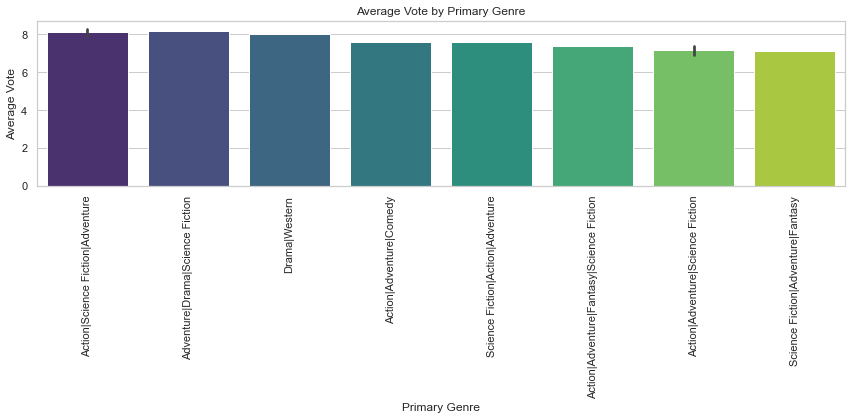

In [18]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='genre_ids', y='vote_average', data=tmdbSoetedData, palette='viridis')
plt.xlabel('Primary Genre')
plt.ylabel('Average Vote')
plt.title('Average Vote by Primary Genre')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

## IMDB Data

In [14]:
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_file:
    zip_file.extractall()

conn = sqlite3.connect('im.db')
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
conn.close()

In [15]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [64]:


imdb_Data = imdb_Data.sort_values(by=['averagerating', 'numvotes'], ascending=False).head(10)

imdb_Data

,genres,averagerating,numvotes
144763,Documentary,10.0,20.0
85712,Documentary,10.0,8.0
87675,Documentary,10.0,7.0
71954,Documentary,10.0,6.0
92455,Documentary,10.0,6.0
120109,"Documentary,History",10.0,6.0
120584,"Adventure,Comedy",10.0,6.0
1857,Documentary,10.0,5.0
4016,"Comedy,Drama",10.0,5.0
16767,"Crime,Documentary",10.0,5.0


In [57]:
imdb_Data.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [49]:
movies_budgets = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz', compression='gzip', encoding='latin1')
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [50]:
movie_gross = pd.read_csv('zippedData\\bom.movie_gross.csv.gz', compression='gzip', encoding='latin1')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
movie_basics.head()

In [ ]:
movie_ratings.head()

In [ ]:
movie_gross.head()

In [ ]:
tmdbGenre = {28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [ ]:
movies_details['genre_ids'][0].
